https://www.cnblogs.com/wojianxin/p/12602490.html

In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

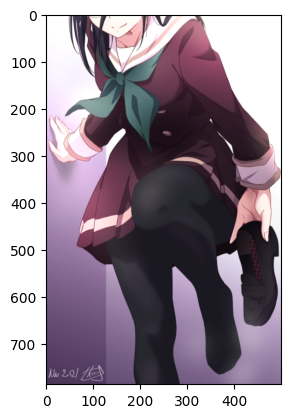

In [2]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# findContours 轮廓发现

轮廓发现是基于图像边缘提取的基础寻找对象轮廓的方法

所以边缘提取的阈值选定会影响最终轮廓发现结果

## 1.先要做边缘检测,获取二值图形

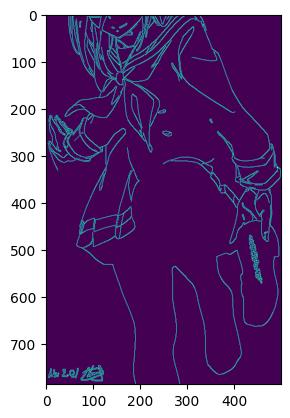

In [3]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c)

## 2.计算轮廓

mode:
- RETR_LIST: 这是最简单的一种寻找方式，它不建立轮廓间的子属关系，也就是所有轮廓都属于同一层级。这样，hierarchy中的后两个值[First Child, Parent]都为-1。
- RETR_TREE: 会完整建立轮廓的层级从属关系
- RETR_EXTERNAL: 这种方式只寻找最高层级的轮廓
- RETR_CCOMP: 把所有的轮廓只分为2个层级，不是外层的就是里层的

hierarchy: 包含4个值的数组 [Next, Previous, First Child, Parent]
- Next：与当前轮廓处于同一层级的下一条轮廓
举例来说，前面图中跟0处于同一层级的下一条轮廓是1，所以Next=1；同理，对轮廓1来说，Next=2；那么对于轮廓2呢？没有与它同一层级的下一条轮廓了，此时Next=-1。
- Previous：与当前轮廓处于同一层级的上一条轮廓
跟前面一样，对于轮廓1来说，Previous=0；对于轮廓2，Previous=1；对于轮廓2a，没有上一条轮廓了，所以Previous=-1。
- First Child：当前轮廓的第一条子轮廓
比如对于轮廓2，第一条子轮廓就是轮廓2a，所以First Child=2a；对轮廓3，First Child=3a。
- Parent：当前轮廓的父轮廓
比如2a的父轮廓是2，Parent=2；轮廓2没有父轮廓，所以Parent=-1。

In [4]:
# 返回值为: 发现的轮廓对象, 图像的拓扑结构
contours, hierarchy = cv2.findContours(
    image=c,
    mode=cv2.RETR_TREE, # 方法
    method=cv2.CHAIN_APPROX_SIMPLE,
)
print(type(contours), type(hierarchy))
print(len(contours))
print(hierarchy.shape)

<class 'tuple'> <class 'numpy.ndarray'>
262
(1, 262, 4)


In [5]:
for i in contours:
    print(i.shape)

(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(46, 1, 2)
(6, 1, 2)
(1, 1, 2)
(23, 1, 2)
(19, 1, 2)
(4, 1, 2)
(6, 1, 2)
(11, 1, 2)
(6, 1, 2)
(10, 1, 2)
(48, 1, 2)
(4, 1, 2)
(67, 1, 2)
(6, 1, 2)
(25, 1, 2)
(6, 1, 2)
(10, 1, 2)
(6, 1, 2)
(129, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(24, 1, 2)
(10, 1, 2)
(6, 1, 2)
(8, 1, 2)
(26, 1, 2)
(14, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(131, 1, 2)
(4, 1, 2)
(6, 1, 2)
(6, 1, 2)
(10, 1, 2)
(6, 1, 2)
(8, 1, 2)
(54, 1, 2)
(21, 1, 2)
(106, 1, 2)
(7, 1, 2)
(8, 1, 2)
(8, 1, 2)
(37, 1, 2)
(6, 1, 2)
(8, 1, 2)
(14, 1, 2)
(2, 1, 2)
(181, 1, 2)
(18, 1, 2)
(6, 1, 2)
(11, 1, 2)
(10, 1, 2)
(8, 1, 2)
(8, 1, 2)
(19, 1, 2)
(12, 1, 2)
(36, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)
(35, 1, 2)
(2, 1, 2)
(2, 1, 2)
(16, 1, 2)
(6, 1, 2)
(12, 1, 2)
(6, 1, 2)
(74, 1, 2)
(6, 1, 2)
(42, 1, 2)
(2, 1, 2)
(2, 1, 2)
(129, 1, 2)
(13, 1, 2)
(2, 1, 2)
(10, 1, 2)
(2, 1, 2)
(2, 1, 2)
(149, 1, 2)
(44, 1, 2)
(93, 1

In [6]:
# [Next, Previous, First Child, Parent] -1代表不存在
for i in hierarchy[0]:
    print(i)

[ 1 -1 -1 -1]
[ 2  0 -1 -1]
[ 3  1 -1 -1]
[ 4  2 -1 -1]
[ 6  3  5 -1]
[-1 -1 -1  4]
[ 7  4 -1 -1]
[14  6  8 -1]
[ 9 -1 -1  7]
[10  8 -1  7]
[11  9 -1  7]
[12 10 -1  7]
[13 11 -1  7]
[-1 12 -1  7]
[16  7 15 -1]
[-1 -1 -1 14]
[18 14 17 -1]
[-1 -1 -1 16]
[22 16 19 -1]
[20 -1 -1 18]
[21 19 -1 18]
[-1 20 -1 18]
[50 18 23 -1]
[24 -1 -1 22]
[25 23 -1 22]
[26 24 -1 22]
[27 25 -1 22]
[28 26 -1 22]
[29 27 -1 22]
[30 28 -1 22]
[31 29 -1 22]
[32 30 -1 22]
[33 31 -1 22]
[34 32 -1 22]
[35 33 -1 22]
[36 34 -1 22]
[37 35 -1 22]
[38 36 -1 22]
[39 37 -1 22]
[40 38 -1 22]
[41 39 -1 22]
[42 40 -1 22]
[43 41 -1 22]
[44 42 -1 22]
[45 43 -1 22]
[46 44 -1 22]
[47 45 -1 22]
[48 46 -1 22]
[49 47 -1 22]
[-1 48 -1 22]
[51 22 -1 -1]
[55 50 52 -1]
[53 -1 -1 51]
[54 52 -1 51]
[-1 53 -1 51]
[58 51 56 -1]
[57 -1 -1 55]
[-1 56 -1 55]
[59 55 -1 -1]
[60 58 -1 -1]
[69 59 61 -1]
[62 -1 -1 60]
[63 61 -1 60]
[64 62 -1 60]
[65 63 -1 60]
[66 64 -1 60]
[67 65 -1 60]
[68 66 -1 60]
[-1 67 -1 60]
[70 60 -1 -1]
[71 69 -1 -1]
[72 70

## 3.绘制轮廓

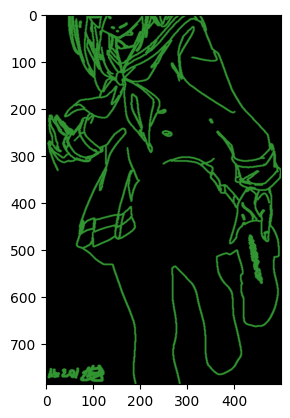

In [7]:
black = np.zeros(image.shape, dtype=np.uint8)
for i in range(len(contours)):
    cv2.drawContours(
        image=black,
        contours=contours,  # counters 发现的轮廓对象
        contourIdx=i,       # counter id,可以设置为 -1 绘制其中的所有轮廓
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

    cv2.drawContours(
        image=image,
        contours=contours,  # counters 发现的轮廓对象
        contourIdx=i,       # counter id,可以设置为 -1 绘制其中的所有轮廓
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

plt.imshow(black)

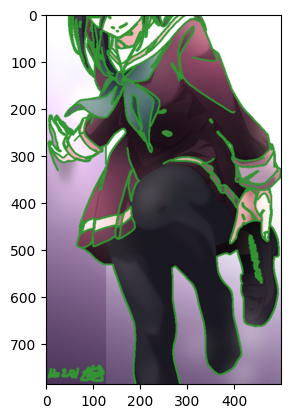

In [8]:
plt.imshow(image)

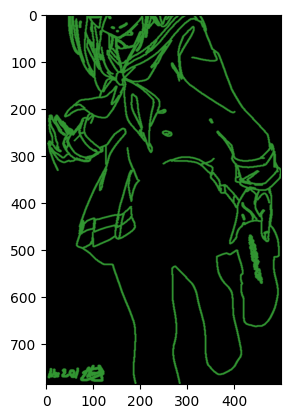

In [9]:
black = np.zeros(image.shape, dtype=np.uint8)
cv2.drawContours(
    image=black,
    contours=contours,  # counters 发现的轮廓对象
    contourIdx=-1,      # counter id,可以设置为 -1 绘制其中的所有轮廓
    color=(50, 150, 50),
    thickness=2,
    lineType=cv2.LINE_AA,
    hierarchy=hierarchy,# 图像的拓扑结构
)

plt.imshow(black)

# contourArea 计算contour面积

239 2142.5


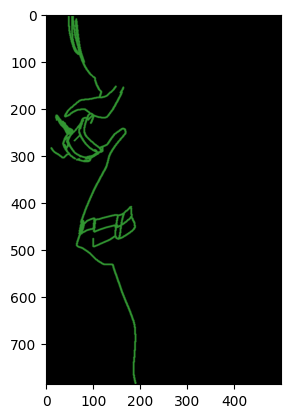

In [10]:
max_area = 0.0
max_index = 0
for i in range(len(contours)):
    # 选择一个contours计算面积
    area = cv2.contourArea(contour=contours[i])
    if area > max_area:
        max_area = area
        max_index = i
print(max_index, max_area)

black = np.zeros(image.shape, dtype=np.uint8)
cv2.drawContours(
    image=black,
    contours=contours,      # counters 发现的轮廓对象
    contourIdx=max_index,   # counter id,可以设置为 -1 绘制其中的所有轮廓
    color=(50, 150, 50),
    thickness=2,
    lineType=cv2.LINE_AA,
    hierarchy=hierarchy,    # 图像的拓扑结构
)

plt.imshow(black)

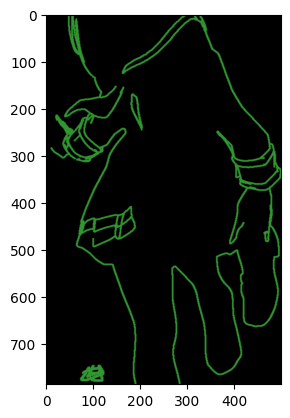

In [14]:
min_area = 500.0
keep_index = []
for i in range(len(contours)):
    # 选择一个contours计算面积
    area = cv2.contourArea(contour=contours[i])
    if area >= min_area:
        keep_index.append(i)

black = np.zeros(image.shape, dtype=np.uint8)
for i in keep_index:
    cv2.drawContours(
        image=black,
        contours=contours,      # counters 发现的轮廓对象
        contourIdx=i,           # counter id,可以设置为 -1 绘制其中的所有轮廓
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,    # 图像的拓扑结构
    )

plt.imshow(black)